In [32]:
import numpy as np
import matplotlib.pyplot as plt

## VARY L

Let's explore how the performance of the RBM changes as we vary some of its hyper-parameters. For instance, let us vary the CD order and keep as fixed all the other hyper-parameters of the architecture (such as the number of hidden layers, the learning rate, the optimizer, ...)

In [33]:
likelihood_L = []
for i in range(3, 11):
    likelihood_L.append(np.load(f'./LIKELIHOOD/HIDDEN/L{i}_RMSprop_0.05_0.05_ep150.npy'))

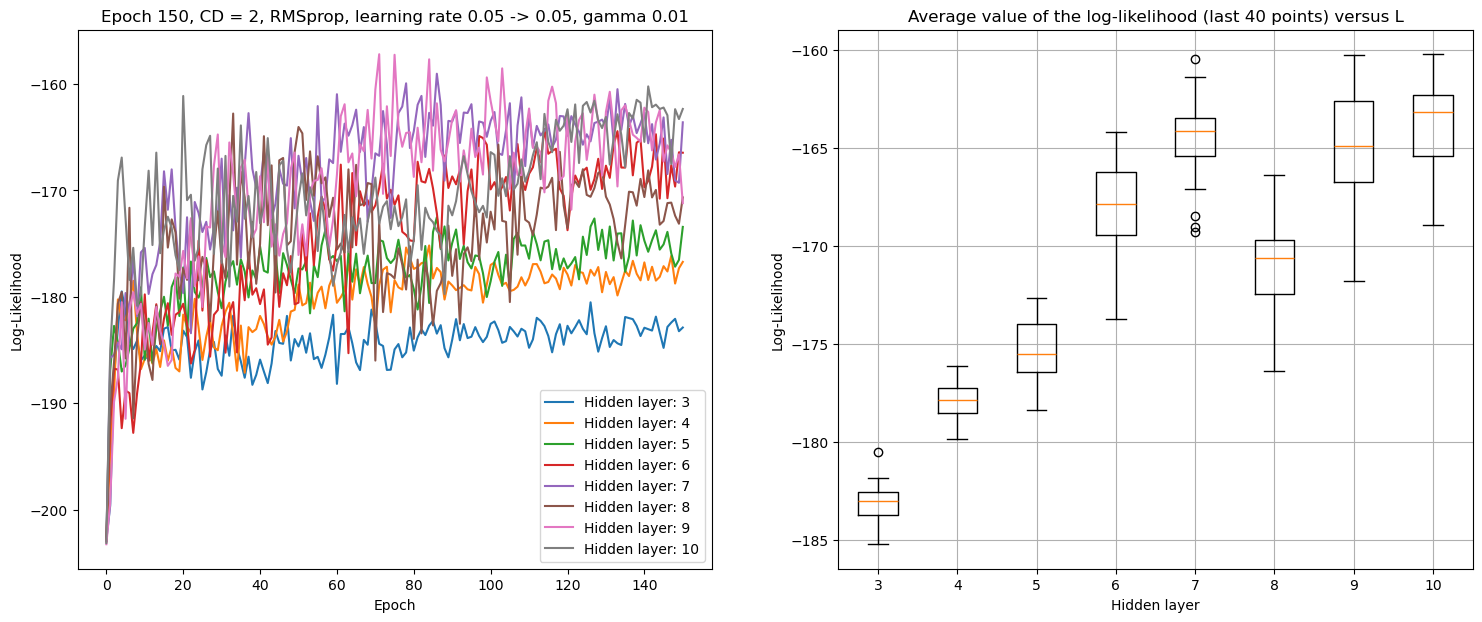

In [34]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, nrows = 1, figsize=(18,7))

for i, l in enumerate(likelihood_L):
    ax1.plot(l, label=f'Hidden layer: {i+3}')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Log-Likelihood')
ax1.set_title('Epoch 150, CD = 2, RMSprop, learning rate 0.05 -> 0.05, gamma 0.01')
ax1.legend()


data = []
for i, l in enumerate(likelihood_L):
    d = l[-40:]
    data.append(d)

ax2.boxplot(data)
ax2.set_xlabel('Hidden layer')
ax2.set_ylabel('Log-Likelihood')
ax2.set_title("Average value of the log-likelihood (last 40 points) versus L")
ax2.set_xticklabels(range(3,11))
ax2.grid()

plt.show()

# FIX OPTIMAL L = 6; VARYING CD

In [35]:
likelihood_CD = []
for i in range(2, 12, 2):
    likelihood_CD.append(np.load(f'./LIKELIHOOD/CD_STEPS/CD{i}_L6_RMSprop_0.05_0.05_ep150.npy'))

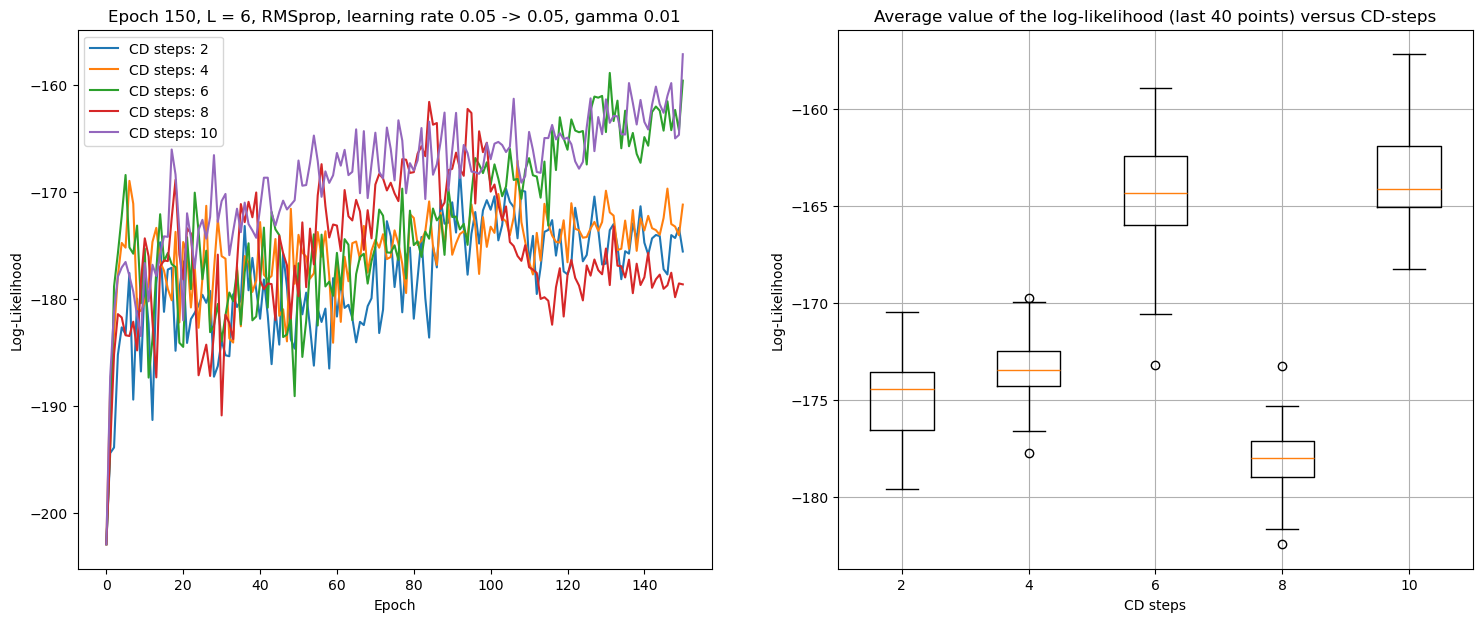

In [36]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, nrows = 1, figsize=(18,7))

for i, l in enumerate(likelihood_CD):
    ax1.plot(l, label=f'CD steps: {i*2+2}')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Log-Likelihood')
ax1.set_title('Epoch 150, L = 6, RMSprop, learning rate 0.05 -> 0.05, gamma 0.01')
ax1.legend()


data = []
for i, l in enumerate(likelihood_CD):
    d = l[-40:]
    data.append(d)

ax2.boxplot(data)
ax2.set_xlabel('CD steps')
ax2.set_ylabel('Log-Likelihood')
ax2.set_title("Average value of the log-likelihood (last 40 points) versus CD-steps")
ax2.set_xticklabels(range(2, 12, 2))
ax2.grid()

plt.show()

## OPTIMAL L = 6, CD = 2. VARYING OPTIMIZER

In [37]:
likelihood_opt = []
opt = ["SGD","RMSprop"]
for i in opt:
    likelihood_opt.append(np.load(f'./LIKELIHOOD/OPT/opt{i}_L6_CD2_0.05_0.05_ep150.npy'))

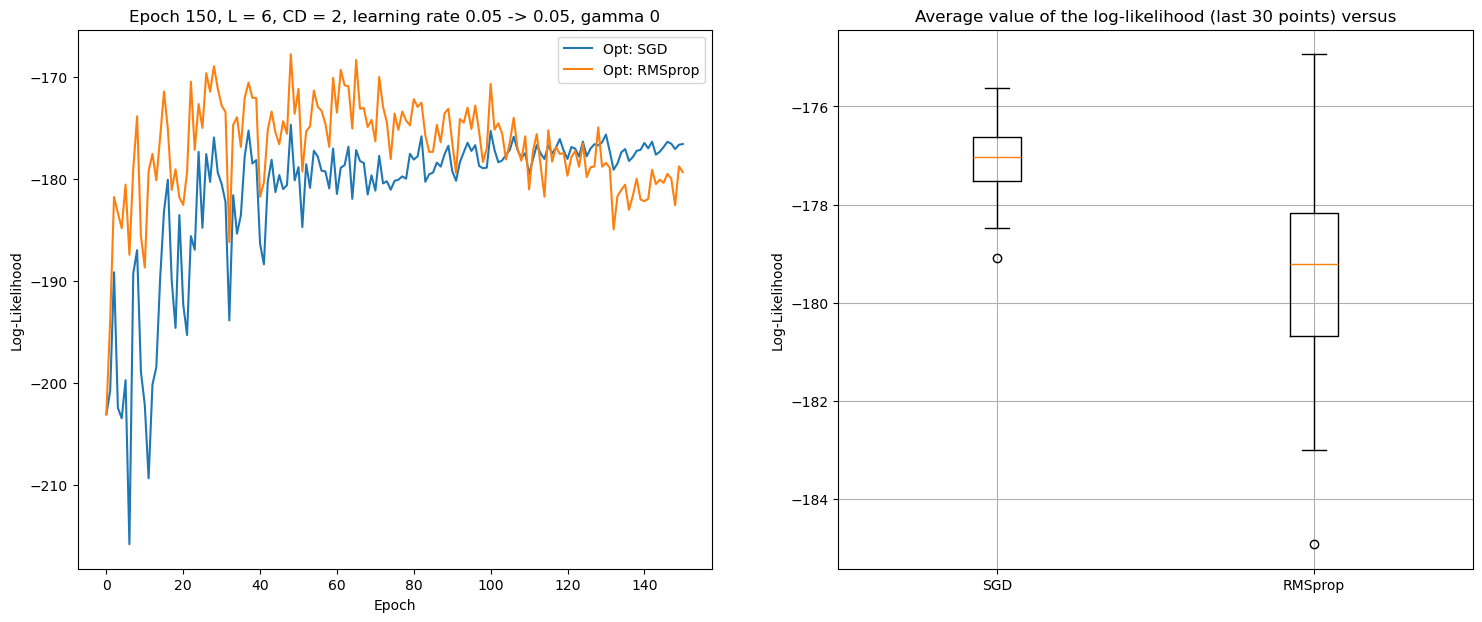

In [38]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, nrows = 1, figsize=(18,7))

for i, l in zip(opt, likelihood_opt):
    ax1.plot(l, label=f'Opt: {i}')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Log-Likelihood')
ax1.set_title('Epoch 150, L = 6, CD = 2, learning rate 0.05 -> 0.05, gamma 0')
ax1.legend()


data = []
for i, l in enumerate(likelihood_opt):
    d = l[-40:]
    data.append(d)

ax2.boxplot(data)
ax2.set_ylabel('Log-Likelihood')
ax2.set_title("Average value of the log-likelihood (last 30 points) versus")
ax2.set_xticklabels(opt)
ax2.grid()

plt.show()

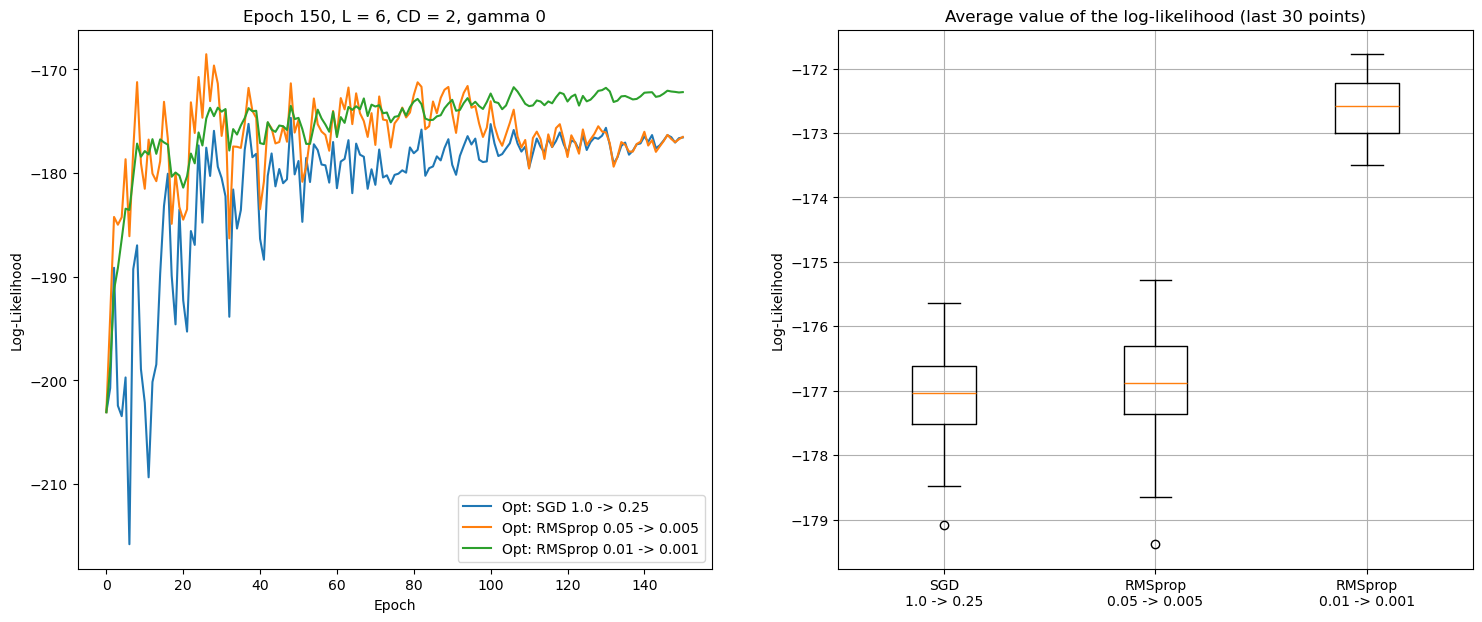

In [42]:
likelihood_opt = []
likelihood_opt.append(np.load(f'./LIKELIHOOD/OPT/optSGD_L6_CD2_0.05_0.05_ep150.npy'))
likelihood_opt.append(np.load(f'./LIKELIHOOD/OPT/optRMSprop_L6_CD2_0.05_0.005_ep150.npy'))
likelihood_opt.append(np.load(f'./LIKELIHOOD/OPT/optRMSprop_L6_CD2_0.01_0.001_ep150.npy'))

fig, (ax1, ax2) = plt.subplots(ncols = 2, nrows = 1, figsize=(18,7))


ax1.plot(likelihood_opt[0], label=f'Opt: SGD 1.0 -> 0.25')
ax1.plot(likelihood_opt[1], label=f'Opt: RMSprop 0.05 -> 0.005')
ax1.plot(likelihood_opt[2], label=f'Opt: RMSprop 0.01 -> 0.001')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Log-Likelihood')
ax1.set_title('Epoch 150, L = 6, CD = 2, gamma 0')
ax1.legend()


data = []
for i, l in enumerate(likelihood_opt):
    d = l[-40:]
    data.append(d)

ax2.boxplot(data)
ax2.set_ylabel('Log-Likelihood')
ax2.set_title("Average value of the log-likelihood (last 30 points)")
ax2.set_xticklabels(["SGD\n1.0 -> 0.25", "RMSprop\n0.05 -> 0.005", "RMSprop\n0.01 -> 0.001"])
ax2.grid()

plt.show()


## FIXING L = 6, CD = 2, OPT = RMSPROP (LR=0.005). VARYING $\gamma$

In [43]:
likelihood_gamma = []
gamma = [0, 0.001, 0.01, 0.1]
for i in gamma:
    likelihood_gamma.append(np.load(f'./LIKELIHOOD/GAMMA/GAMMA{i}_L6_RMSprop_0.05_0.005_ep150.npy'))

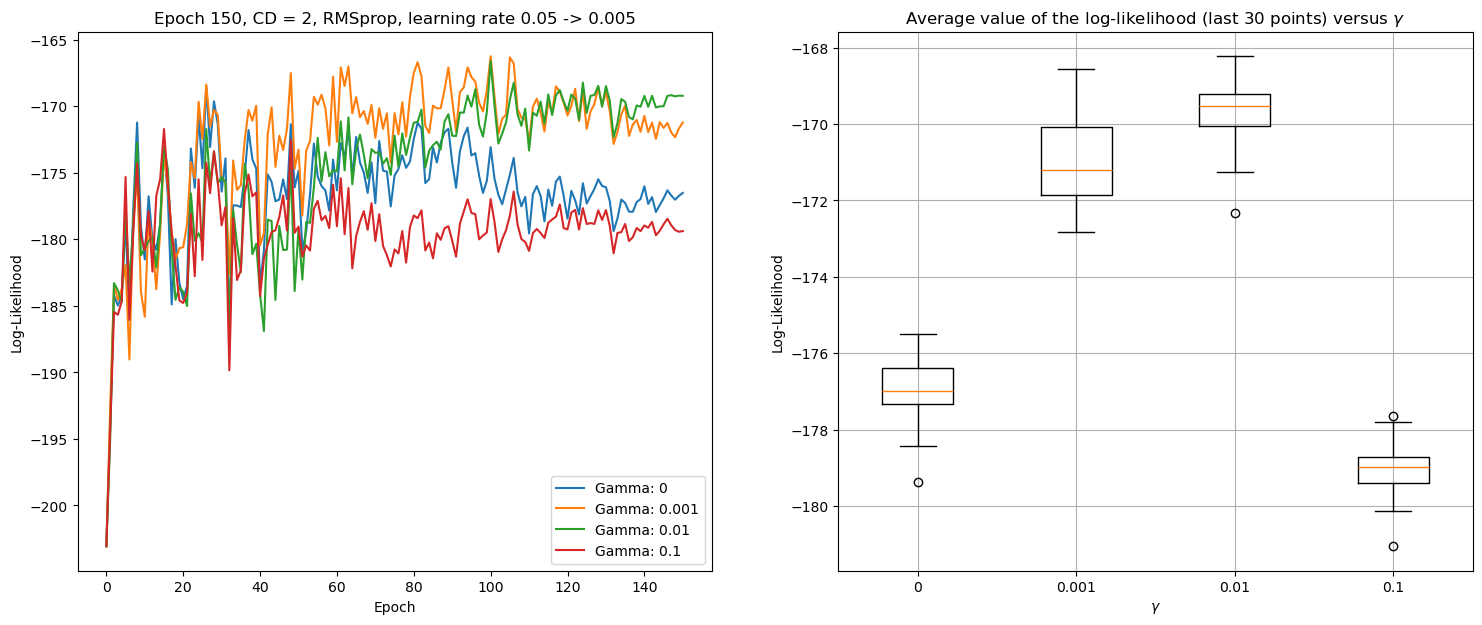

In [44]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, nrows = 1, figsize=(18,7))

for i, l in zip(gamma, likelihood_gamma):
    ax1.plot(l, label=f'Gamma: {i}')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Log-Likelihood')
ax1.set_title('Epoch 150, CD = 2, RMSprop, learning rate 0.05 -> 0.005')
ax1.legend()


data = []
for i, l in enumerate(likelihood_gamma):
    d = l[-30:]
    data.append(d)

ax2.boxplot(data)
ax2.set_xlabel('$\\gamma$')
ax2.set_ylabel('Log-Likelihood')
ax2.set_title("Average value of the log-likelihood (last 30 points) versus $\\gamma$")
ax2.set_xticklabels(gamma)
ax2.grid()

plt.show()

## COMMENTO CHE HA FATTO IL PROF:
## CI STA CHE CON UN GAMMA ALTO IL MODELLO NON APPRENDI 
## PERÒ MAGARI I PESI SONO PIÙ PULITI -> TRADEOFF TRA LIKELIHOOD E PESI

## L = 6, CD = 2, RMSprop, gamma = 0.001, POTTS AND spins

Let's choose L = 6, CD = 2, RMSProp.
Spins and potts